<a href="https://colab.research.google.com/github/MH-1294/ML_DL/blob/main/Custom%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
import kagglehub

# Step 1: Download dataset via kagglehub
faysalmiah1721758_potato_dataset_path = kagglehub.dataset_download('faysalmiah1721758/potato-dataset')
print("✅ Data download complete.")

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Step 2: Load dataset from KaggleHub path
dataset = image_dataset_from_directory(
    faysalmiah1721758_potato_dataset_path,
    labels='inferred',
    label_mode='categorical',  # one-hot encoding
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset="both",
    seed=42
)

# Step 3: Unpack train and validation datasets
train_ds, val_ds = dataset

# Step 4: Normalize pixel values (0–1)
normalization_layer = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Step 5: Optional - Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Step 6: Print class names
class_names = dataset[0].class_names
print("✅ Class names detected:", class_names)


100%|██████████| 37.8M/37.8M [00:00<00:00, 168MB/s]

Extracting files...


✅ Data download complete.
Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Using 430 files for validation.
✅ Class names detected: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,387 (110.89 KB)

 Trainable params: 28,163 (110.01 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.7814 - loss: 0.5189 - val_accuracy: 0.4837 - val_loss: 1.0149
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.9358 - loss: 0.1928 - val_accuracy: 0.4837 - val_loss: 2.2006
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.9551 - loss: 0.1545 - val_accuracy: 0.4837 - val_loss: 3.3460
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9460 - loss: 0.1354 - val_accuracy: 0.4837 - val_loss: 5.1969
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.9494 - loss: 0.1333 - val_accuracy: 0.4837 - val_loss: 4.5332
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9470 - loss: 0.1297 - val_accuracy: 0.4837 - val_loss: 5.3592
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9693 - loss: 0.0932 - val_accuracy: 0.4837 - val_loss: 2.9088
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9569 - loss: 0.1053 - val_accuracy: 0.4884 - v

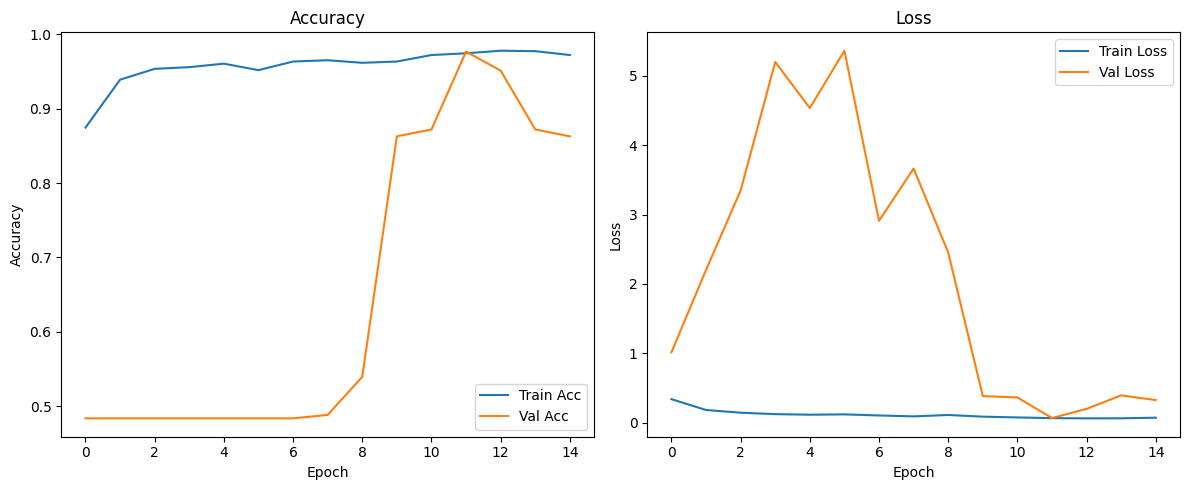

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

# Step 1: Rebuild lightweight CNN using Functional API
def build_lightweight_cnn(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Step 2: Build model
model = build_lightweight_cnn()
model.summary()

# Step 3: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
EPOCHS = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

# Step 5: Plot training results
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Save model for Grad-CAM & inference
model.save('lightweight_potato_model.h5')


Common setup

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Hyperparameters
EPOCHS = 15
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = len(class_names)
BATCH_SIZE = 32

# Utility: Add custom classifier head
def build_transfer_model(base_model):
    base_model.trainable = False  # Freeze pretrained layers

    inputs = tf.keras.Input(shape=INPUT_SHAPE)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Utility: Plot training results
def plot_history(history, title):
    plt.figure(figsize=(10, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Utility: Count and print model size
def model_summary_report(model, name):
    size = model.count_params()
    temp_file = f"{name}_model.h5"
    model.save(temp_file)
    mb_size = os.path.getsize(temp_file) / (1024 * 1024)
    print(f"📦 {name}:")
    print(f"   • Total Parameters: {size:,}")
    print(f"   • Model File Size: {mb_size:.2f} MB\n")
    os.remove(temp_file)


🚀 Training MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7040 - loss: 0.6840 - val_accuracy: 0.9419 - val_loss: 0.2157
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9206 - loss: 0.2344 - val_accuracy: 0.9605 - val_loss: 0.1420
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9594 - loss: 0.1374 - val_accuracy: 0.9651 - val_loss: 0.1161
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9586 - loss: 0.1267 - val_accuracy: 0.9698 - val_loss: 0.1004
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9679 - loss: 0.1002 - val_accuracy: 0.9744 - val_loss: 0.0914
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9749 - loss: 0.0892 - val_accuracy: 0.9791 - val_loss: 0.0860
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9774 - loss: 0.0723 - val_accuracy: 0.9744 - val_loss: 0.0798
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 90s 

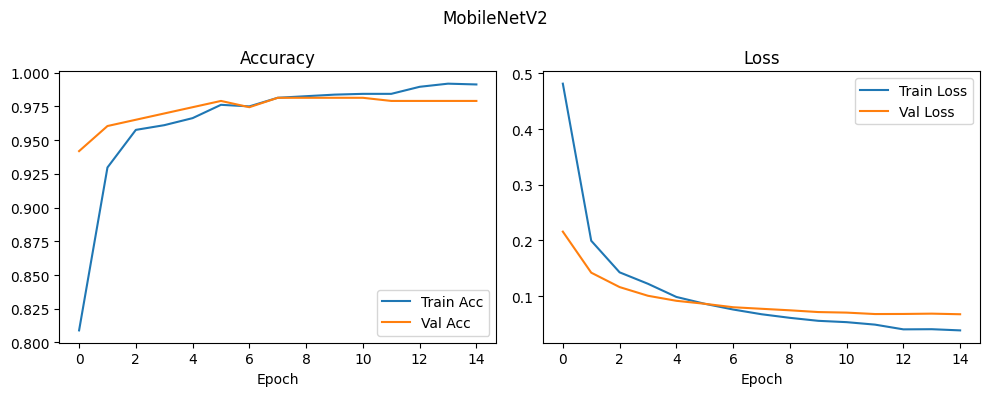

📦 MobileNetV2:
   • Total Parameters: 2,261,827
   • Model File Size: 9.01 MB



In [6]:
print("🚀 Training MobileNetV2...")

mobilenet_base = tf.keras.applications.MobileNetV2(
    input_shape=INPUT_SHAPE,
    include_top=False,
    weights='imagenet'
)

mobilenet_model = build_transfer_model(mobilenet_base)
mobilenet_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

history_mobilenet = mobilenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

plot_history(history_mobilenet, "MobileNetV2")
model_summary_report(mobilenet_model, "MobileNetV2")
# Step 6: Save model for Grad-CAM & inference
model.save('MobileNetV2_potato_model.h5')

In [7]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Get true and predicted labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = mobilenet_model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Step 2: Print classification report
print("📄 Classification Report for MobileNetV2:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
📄 Classification Report for MobileNetV2:

                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.99      0.99       182
 Potato___Late_blight       0.96      1.00      0.98       208
     Potato___healthy       1.00      0.82      0.90        40

             accuracy                           0.98       430
            macro avg       0.99      0.94      0.96       430
         weighted avg       0.98      0.98      0.98       430



In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# Directories
os.makedirs("gradcam_misclassified_healthy", exist_ok=True)
os.makedirs("gradcam_classwise_examples", exist_ok=True)

class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Step 1: Identify last conv layer in MobileNetV2 base
mobilenet_feature_extractor = mobilenet_model.get_layer('mobilenetv2_1.00_224')
for layer in reversed(mobilenet_feature_extractor.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break
print("✅ Last Conv Layer:", last_conv_layer_name)

# Step 2: Grad-CAM function

def get_gradcam_heatmap_mobilenet(img_array, model, conv_layer_name, pred_index=None):
    # ✅ Step 1: Preprocess input
    preprocessed_input = preprocess_input(img_array.numpy())
    preprocessed_input = tf.convert_to_tensor(preprocessed_input)

    # ✅ Step 2: Use MobileNetV2 base model directly
    base_model = model.get_layer('mobilenetv2_1.00_224')
    conv_layer_output = base_model.get_layer(conv_layer_name).output

    # ✅ Step 3: Build intermediate model
    conv_model = tf.keras.Model(inputs=base_model.input, outputs=[conv_layer_output, base_model.output])

    # ✅ Step 4: Grad-CAM logic
    with tf.GradientTape() as tape:
        conv_outputs, predictions = conv_model(preprocessed_input)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()


# Step 3: Overlay heatmap and save
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = tf.keras.preprocessing.image.array_to_img(img)
    img = np.array(img)
    heatmap_resized = tf.image.resize(heatmap[..., np.newaxis], (img.shape[0], img.shape[1]))
    heatmap_resized = tf.squeeze(heatmap_resized)
    heatmap_color = cm.jet(heatmap_resized)[:, :, :3]
    superimposed_img = heatmap_color * 255 * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    plt.imsave(cam_path, superimposed_img)

# Step 4A: Misclassified Healthy Leaves
misclassified_healthy_count = 0
for images, labels in val_ds:
    preds = mobilenet_model.predict(images)
    for i in range(len(images)):
        true = tf.argmax(labels[i]).numpy()
        pred = tf.argmax(preds[i]).numpy()
        if true == 2 and pred != 2:
            heatmap = get_gradcam_heatmap_mobilenet(tf.expand_dims(images[i], axis=0), mobilenet_model, last_conv_layer_name, pred)
            fname = f"gradcam_misclassified_healthy/healthy_misclassified_as_{class_names[pred]}_{misclassified_healthy_count}.png"
            save_and_display_gradcam(images[i], heatmap, fname)
            misclassified_healthy_count += 1
        if misclassified_healthy_count >= 5:
            break
    if misclassified_healthy_count >= 5:
        break

# Step 4B: Classwise Correct Predictions
class_captured = {0: False, 1: False, 2: False}
for images, labels in val_ds:
    preds = mobilenet_model.predict(images)
    for i in range(len(images)):
        true = tf.argmax(labels[i]).numpy()
        pred = tf.argmax(preds[i]).numpy()
        if true == pred and not class_captured[true]:
            heatmap = get_gradcam_heatmap_mobilenet(tf.expand_dims(images[i], axis=0), mobilenet_model, last_conv_layer_name, pred)
            fname = f"gradcam_classwise_examples/class_{class_names[true].replace('___','_')}.png"
            save_and_display_gradcam(images[i], heatmap, fname)
            class_captured[true] = True
        if all(class_captured.values()):
            break
    if all(class_captured.values()):
        break

print("✅ Grad-CAM done for MobileNetV2 — both misclassified healthy and classwise samples.")


✅ Last Conv Layer: Conv_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
✅ Grad-CAM done for MobileNetV2 — both misclassified healthy and classwise samples.


🚀 Training VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1348s 25s/step - accuracy: 0.4739 - loss: 1.0488 - val_accuracy: 0.7512 - val_loss: 0.8278
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1333s 24s/step - accuracy: 0.6314 - loss: 0.7921 - val_accuracy: 0.8023 - val_loss: 0.7214
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1278s 24s/step - accuracy: 0.7528 - loss: 0.6869 - val_accuracy: 0.8233 - val_loss: 0.6588
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1290s 24s/step - accuracy: 0.7667 - loss: 0.6414 - val_accuracy: 0.8395 - val_loss: 0.6024
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1275s 24s/step - accuracy: 0.7913 - loss: 0.6093 - val_accuracy: 0.8395 - val_loss: 0.5650
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1281s 24s/step - accuracy: 0.8033 - loss: 0.5582 - val_accuracy: 0.8535 - val_loss: 0.5230
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1293s 24s/step - accuracy: 0.8132 - loss: 0.5232 - val_accuracy: 0.8698 - val_loss: 0.4902
Epoch 8/15
54/54 ━━━━━━━━━

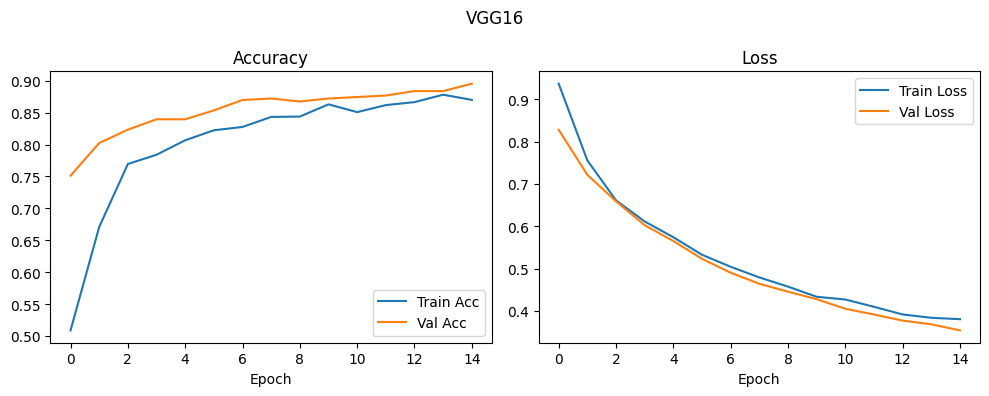

📦 VGG16:
   • Total Parameters: 14,716,227
   • Model File Size: 56.22 MB



In [9]:
print("🚀 Training VGG16...")

vgg_base = tf.keras.applications.VGG16(
    input_shape=INPUT_SHAPE,
    include_top=False,
    weights='imagenet'
)

vgg_model = build_transfer_model(vgg_base)
vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_vgg = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

plot_history(history_vgg, "VGG16")
model_summary_report(vgg_model, "VGG16")
# Step 6: Save model for Grad-CAM & inference
model.save('vgg-16_potato_model.h5')


🚀 Training EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.4463 - loss: 0.9444 - val_accuracy: 0.4233 - val_loss: 0.9643
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.4758 - loss: 0.9119 - val_accuracy: 0.4233 - val_loss: 0.9567
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.4633 - loss: 0.9197 - val_accuracy: 0.4837 - val_loss: 0.9496
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.4553 - loss: 0.9192 - val_accuracy: 0.4837 - val_loss: 0.9390
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.4622 - loss: 0.9014 - val_accuracy: 0.4837 - val_loss: 0.9377
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.4747 - loss: 0.9147 - val_accuracy: 0.4837 - val_loss: 0.9710
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.4530 - loss: 0.9251 - val_accuracy: 0.4837 - val_loss: 0.9392
Epoch 8/15
54/54 ━━━━━━━━━━━━━━

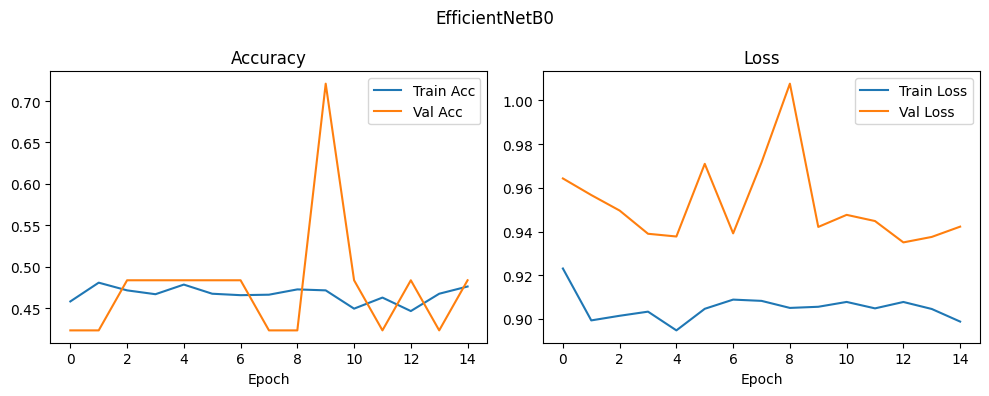

📦 EfficientNetB0:
   • Total Parameters: 4,053,414
   • Model File Size: 15.95 MB



In [10]:
print("🚀 Training EfficientNetB0...")

efficientnet_base = tf.keras.applications.EfficientNetB0(
    input_shape=INPUT_SHAPE,
    include_top=False,
    weights='imagenet'
)

efficientnet_model = build_transfer_model(efficientnet_base)
efficientnet_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history_effnet = efficientnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

plot_history(history_effnet, "EfficientNetB0")
model_summary_report(efficientnet_model, "EfficientNetB0")
model.save('EfficientnetB0-16_potato_model.h5')